<a href="https://colab.research.google.com/github/arvind-prabhu259/Projects/blob/main/Handwritten_number_recognition_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
## Checking out the shapes involved in dataset
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [4]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [5]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000,)


In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
model = Sequential([
    Conv2D(30, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),
    Conv2D(60, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4)

Epoch 1/4
1875/1875 [==============================] - 167s 88ms/step - loss: 0.3182 - accuracy: 0.9545 - val_loss: 0.0867 - val_accuracy: 0.9741
Epoch 2/4
1875/1875 [==============================] - 149s 80ms/step - loss: 0.0660 - accuracy: 0.9802 - val_loss: 0.0754 - val_accuracy: 0.9766
Epoch 3/4
1875/1875 [==============================] - 157s 84ms/step - loss: 0.0439 - accuracy: 0.9864 - val_loss: 0.1185 - val_accuracy: 0.9722
Epoch 4/4
1875/1875 [==============================] - 154s 82ms/step - loss: 0.0339 - accuracy: 0.9895 - val_loss: 0.0984 - val_accuracy: 0.9769


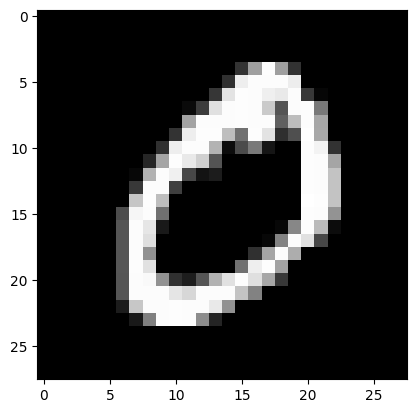

1/1 [==============================] - 0s 145ms/step


Prediction: 0


In [9]:
example = X_train[1]
plt.imshow(example.reshape(28, 28), cmap="gray")
plt.show()
prediction = model.predict(example.reshape(1,28,28,1))
print("\n\nPrediction: {}".format(np.argmax(prediction)))

Preprocessing and extracting digits from test image:

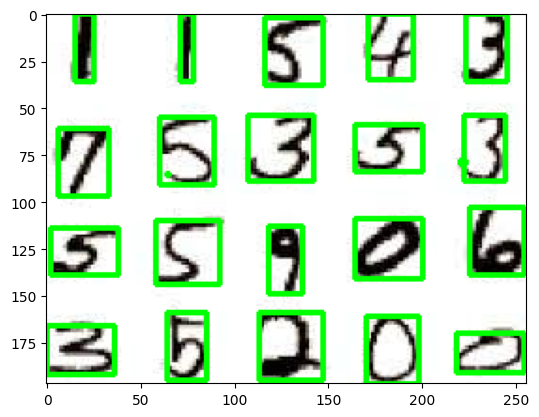

In [10]:
image = cv2.imread('/content/download2.jpg')
grey_img = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thr = cv2.threshold(grey_img.copy(), 95, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thr.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    digit = thr[y:y+h, x:x+w]#cropping digit
    resized = cv2.resize(digit, (22,22))
    padded = np.pad(resized, ((3,3),(3,3)), "constant", constant_values=0)
    preprocessed.append(padded)

plt.imshow(image, cmap="gray")
plt.show()

Making predictions

1/1 [==============================] - 0s 85ms/step


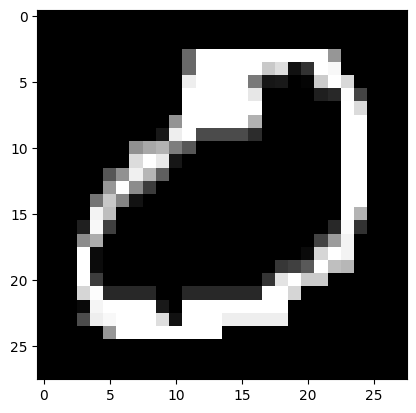

Prediction: 0
1/1 [==============================] - 0s 97ms/step


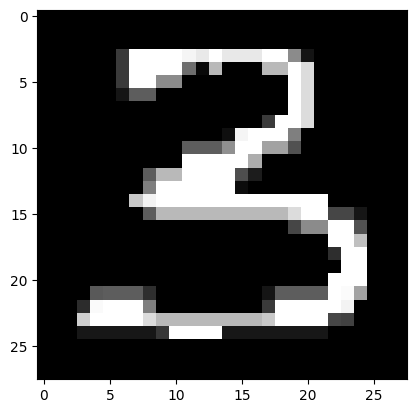

Prediction: 3
1/1 [==============================] - 0s 127ms/step


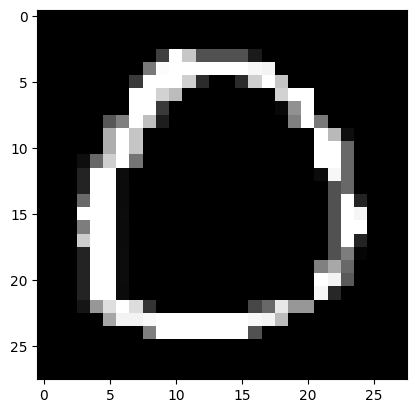

Prediction: 0
1/1 [==============================] - 0s 64ms/step


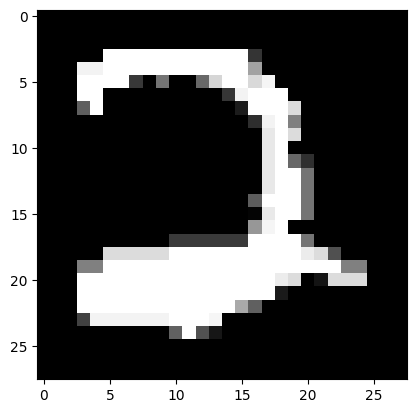

Prediction: 2
1/1 [==============================] - 0s 64ms/step


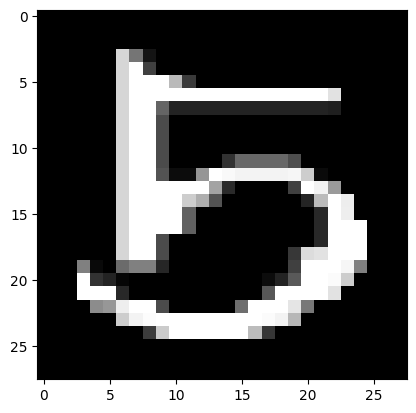

Prediction: 6
1/1 [==============================] - 0s 88ms/step


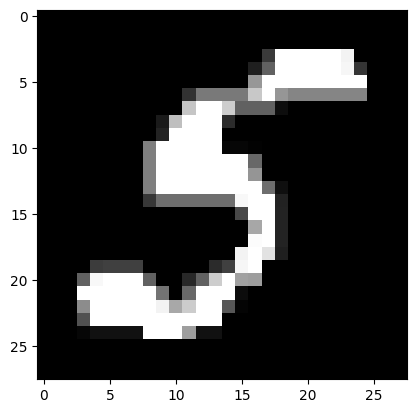

Prediction: 5
1/1 [==============================] - 0s 39ms/step


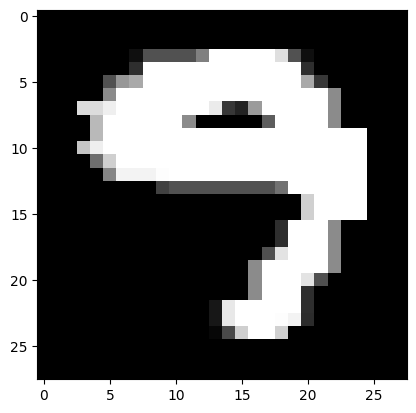

Prediction: 3
1/1 [==============================] - 0s 120ms/step


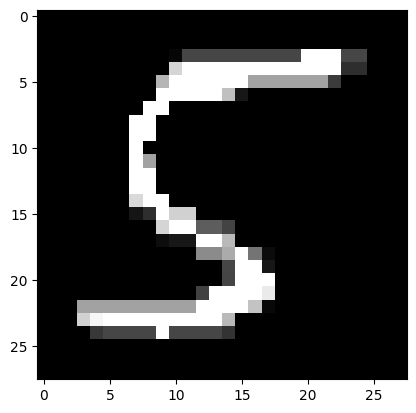

Prediction: 5
1/1 [==============================] - 0s 21ms/step


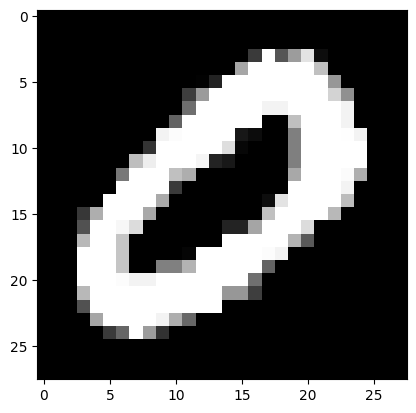

Prediction: 0
1/1 [==============================] - 0s 22ms/step


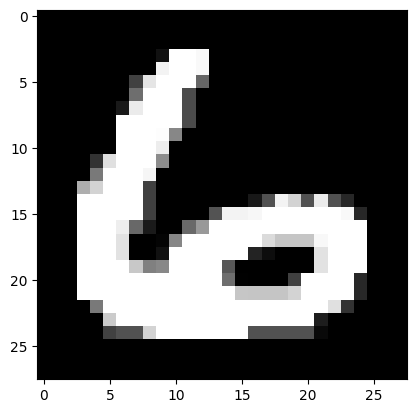

Prediction: 2
1/1 [==============================] - 0s 21ms/step


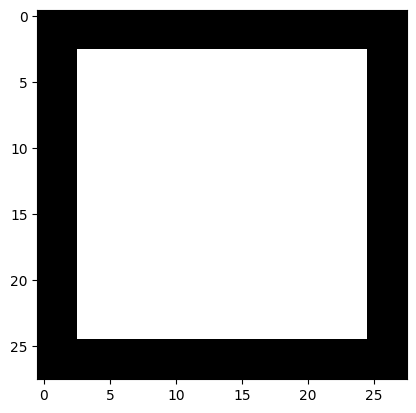

Prediction: 3
1/1 [==============================] - 0s 22ms/step


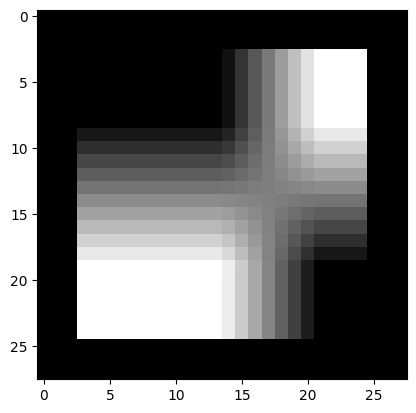

Prediction: 0
1/1 [==============================] - 0s 23ms/step


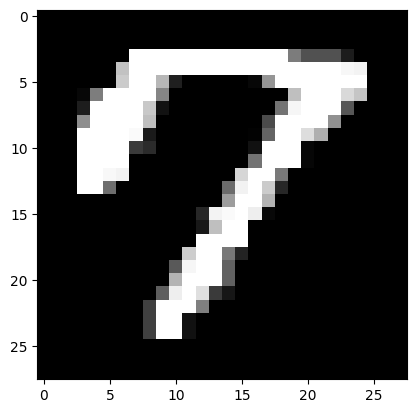

Prediction: 1
1/1 [==============================] - 0s 21ms/step


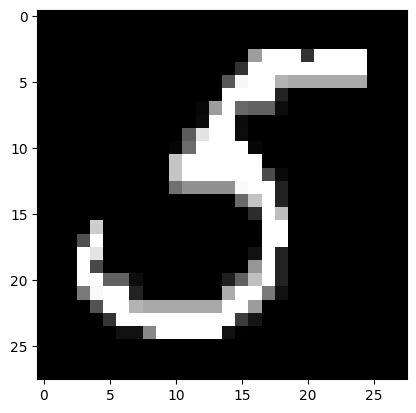

Prediction: 5
1/1 [==============================] - 0s 24ms/step


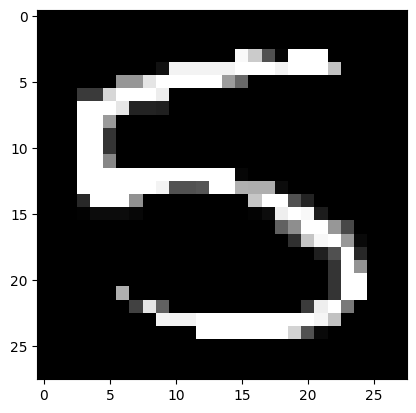

Prediction: 5
1/1 [==============================] - 0s 22ms/step


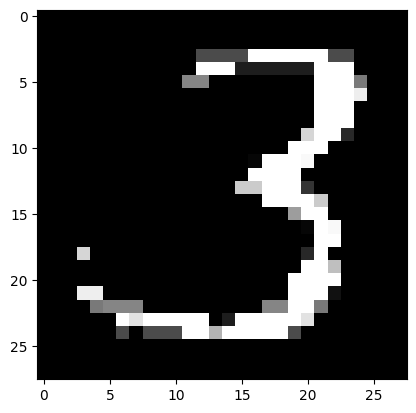

Prediction: 3
1/1 [==============================] - 0s 22ms/step


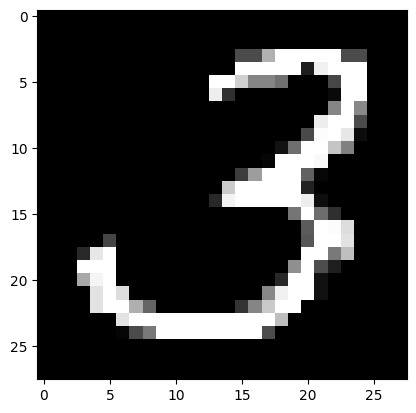

Prediction: 3
1/1 [==============================] - 0s 22ms/step


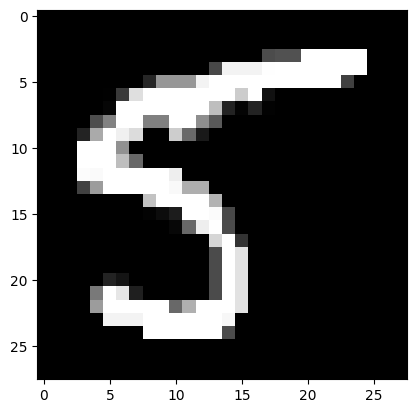

Prediction: 5
1/1 [==============================] - 0s 35ms/step


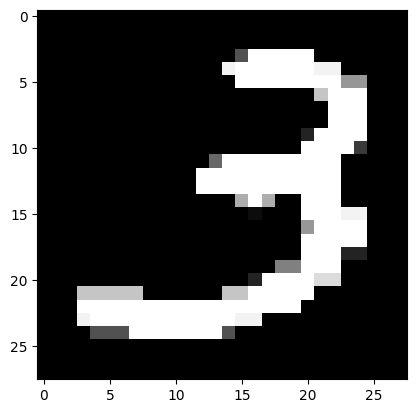

Prediction: 3
1/1 [==============================] - 0s 24ms/step


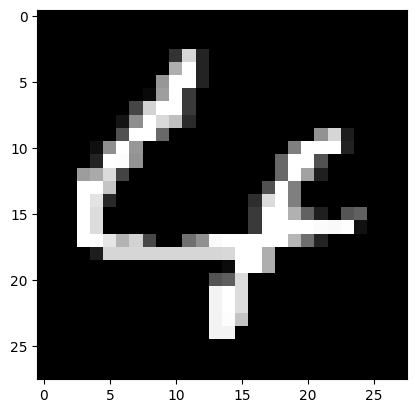

Prediction: 4
1/1 [==============================] - 0s 23ms/step


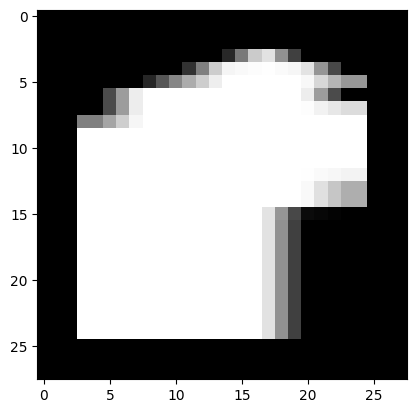

Prediction: 0
1/1 [==============================] - 0s 23ms/step


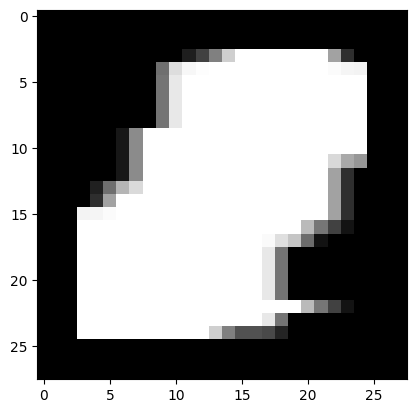

Prediction: 0


In [12]:
predlist = []
for digit in preprocessed:
    prediction = model.predict(digit.reshape(1, 28, 28, 1))
    predlist.append(np.argmax(prediction))
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    print("Prediction: {}".format(np.argmax(prediction)))

In [13]:
for i in predlist:
    print(i)

0
3
0
2
6
5
3
5
0
2
3
0
1
5
5
3
3
5
3
4
0
0
